🎯 COMPLETE ROC CURVE TUTORIAL

📚 SECTION 1: UNDERSTANDING ROC CURVES
----------------------------------------

🔍 ROC CURVE BASICS:

ROC = Receiver Operating Characteristic
Originally developed during WWII to analyze radar signals!

📊 WHAT IT PLOTS:
• X-axis: False Positive Rate (FPR) = FP / (FP + TN)
• Y-axis: True Positive Rate (TPR) = TP / (TP + FN) = Recall/Sensitivity

🎯 WHAT IT SHOWS:
• How well a binary classifier distinguishes between classes
• Trade-off between sensitivity (catching positives) and specificity (avoiding false alarms)
• Performance across ALL possible classification thresholds

💡 KEY INSIGHT:
Instead of evaluating at one threshold, ROC shows performance across ALL thresholds!


📈 SECTION 2: TRUE POSITIVE RATE vs FALSE POSITIVE RATE
----------------------------------------
🏥 MEDICAL EXAMPLE: 20 Patients (12 Healthy, 8 Sick)
Prediction probabilities (higher = more likely to be sick):
 Patient  Actual  Probability
       1 Healthy         0.10
       2 Healthy      

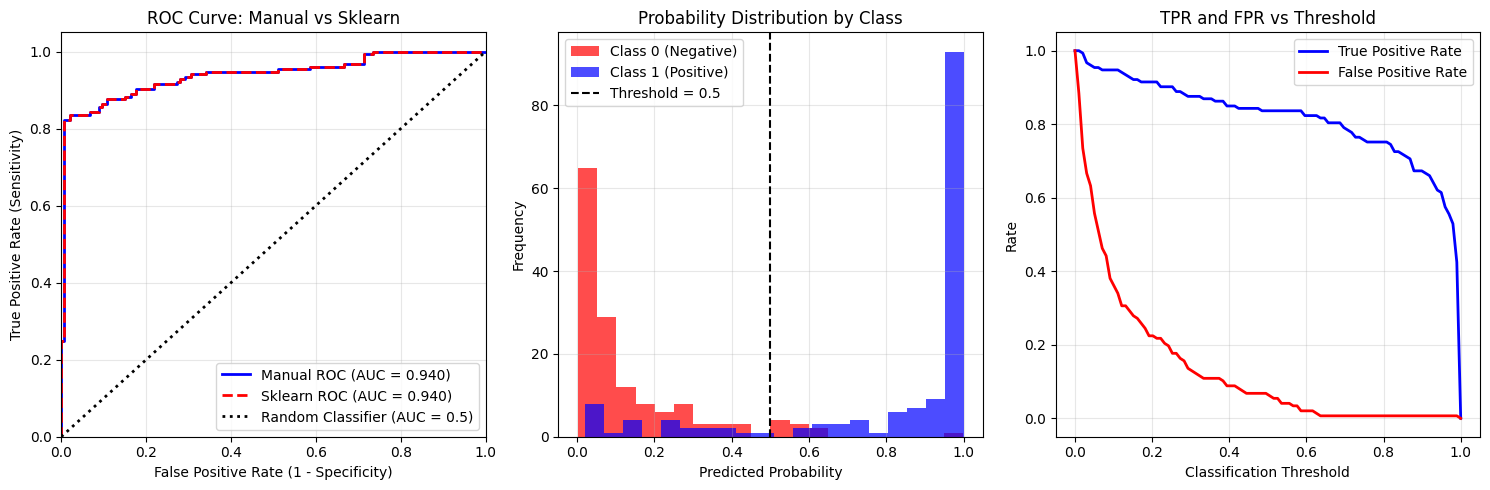



🎯 SECTION 4: INTERPRETING AUC VALUES
----------------------------------------

📏 AUC INTERPRETATION GUIDE:

🏆 AUC = 1.0: Perfect classifier
   • 100% sensitivity and 100% specificity achievable
   • Can perfectly separate classes

🌟 AUC = 0.9-1.0: Excellent discrimination
   • Very good separation between classes
   • Suitable for most practical applications

✅ AUC = 0.8-0.9: Good discrimination
   • Acceptable performance
   • May need threshold tuning

⚠️ AUC = 0.7-0.8: Fair discrimination
   • Limited practical value
   • Consider feature engineering

❌ AUC = 0.6-0.7: Poor discrimination
   • Better than random, but not much
   • Significant model improvement needed

🎲 AUC = 0.5: Random classifier
   • No discriminative ability
   • Equivalent to coin flip

🔄 AUC < 0.5: Worse than random
   • Model is systematically wrong
   • Simply invert predictions to get AUC > 0.5!


🏁 SECTION 5: COMPARING MULTIPLE MODELS WITH ROC
----------------------------------------


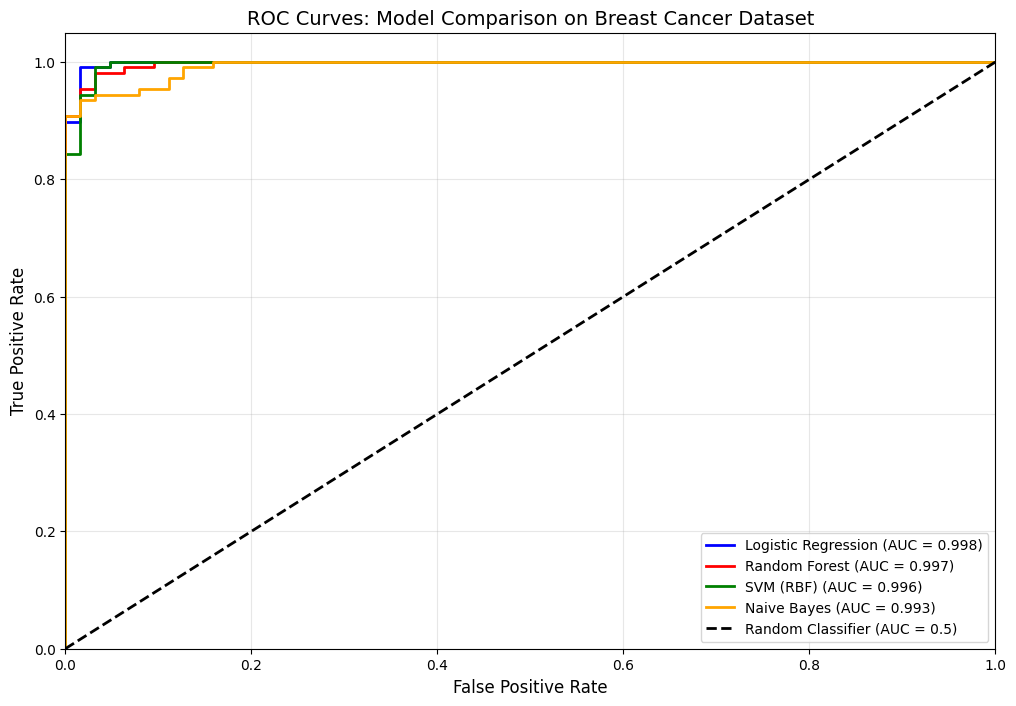


📊 MODEL RANKING BY AUC:
              Model      AUC
Logistic Regression 0.998089
      Random Forest 0.996914
          SVM (RBF) 0.996473
        Naive Bayes 0.992651


⚠️ SECTION 6: ROC CURVE LIMITATIONS
----------------------------------------

🚨 WHEN ROC CURVES CAN BE MISLEADING:

1. 📊 HIGHLY IMBALANCED DATASETS:
   • ROC can be overly optimistic
   • Precision-Recall curves often better
   • Example: 1% positive cases

2. 🎯 DIFFERENT COSTS OF ERRORS:
   • ROC treats all errors equally
   • Medical diagnosis: Missing cancer >> False alarm
   • Fraud detection: Missing fraud >> False flag

3. 🔄 MULTICLASS PROBLEMS:
   • ROC is designed for binary classification
   • Need One-vs-Rest or One-vs-One approach
   • Can become complex to interpret

4. 📈 THRESHOLD SELECTION:
   • ROC shows performance across all thresholds
   • Doesn't help choose optimal threshold
   • Need additional criteria (cost, business rules)


🔍 DEMONSTRATION: Imbalanced Dataset Issue
---------------------------

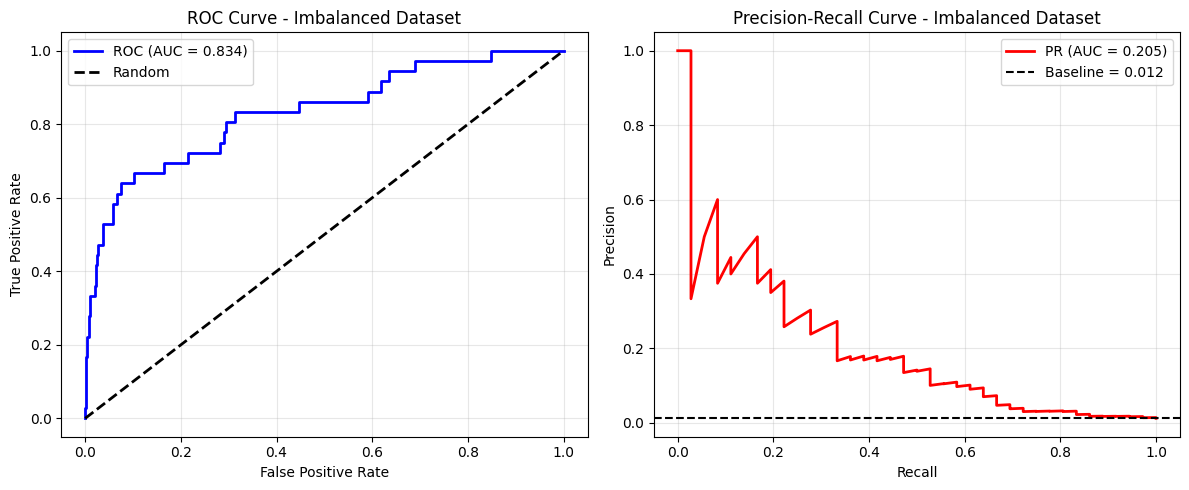

Class distribution: 2964 negative, 36 positive
ROC AUC: 0.834 (looks good!)
PR AUC: 0.205 (reveals poor performance)
📝 Note: ROC looks optimistic, but PR curve shows the real challenge!


🎛️ SECTION 7: PRACTICAL THRESHOLD SELECTION
----------------------------------------
📊 METRICS AT DIFFERENT THRESHOLDS:
   Threshold  Accuracy  Precision  Recall  Specificity     F1
0        0.1     0.965      0.947   1.000        0.905  0.973
1        0.2     0.982      0.973   1.000        0.952  0.986
2        0.3     0.977      0.973   0.991        0.952  0.982
3        0.4     0.982      0.982   0.991        0.968  0.986
4        0.5     0.982      0.991   0.981        0.984  0.986
5        0.6     0.977      0.991   0.972        0.984  0.981
6        0.7     0.965      0.990   0.954        0.984  0.972
7        0.8     0.947      0.990   0.926        0.984  0.957
8        0.9     0.930      0.990   0.898        0.984  0.942


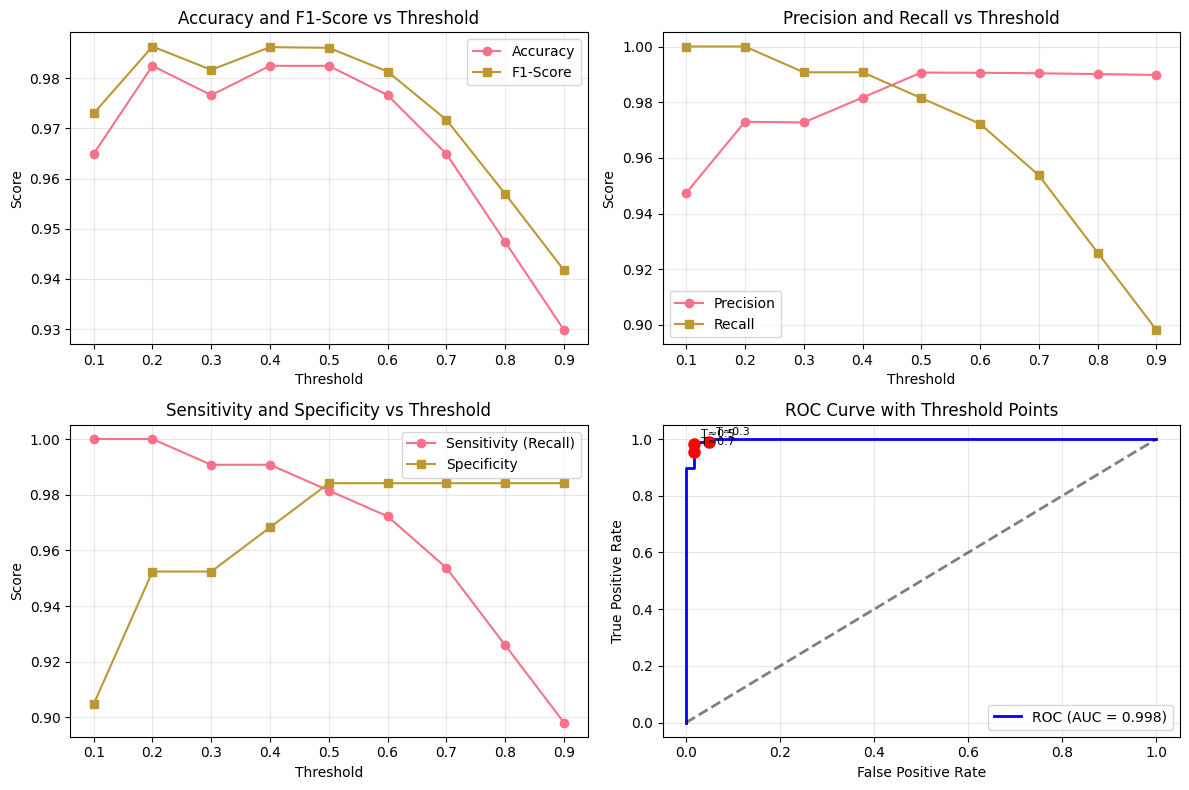



🚀 SECTION 8: ADVANCED ROC CONCEPTS
----------------------------------------

🎓 ADVANCED ROC CONCEPTS:

1. 📐 GEOMETRIC INTERPRETATION:
   • Area under curve = Probability that randomly chosen positive
     has higher score than randomly chosen negative
   • Equivalent to Mann-Whitney U statistic
   • Related to Gini coefficient: Gini = 2×AUC - 1

2. 🎯 OPTIMAL THRESHOLD SELECTION:
   • Youden's Index: max(TPR + TNR - 1)
   • Closest to top-left corner: min(√((1-TPR)² + FPR²))
   • Cost-sensitive: consider business costs

3. 🔄 CROSS-VALIDATION WITH ROC:
   • Average ROC curves across folds
   • Report mean AUC with confidence intervals
   • Stratified CV for imbalanced data

4. 📊 STATISTICAL SIGNIFICANCE:
   • DeLong test for comparing AUCs
   • Bootstrap confidence intervals
   • Permutation tests


🎯 YOUDEN'S INDEX CALCULATION:
------------------------------
Optimal threshold (Youden's Index): 0.50
Youden's Index value: 0.966
At this threshold:
  - Sensitivity: 0.981
  - Specificity: 

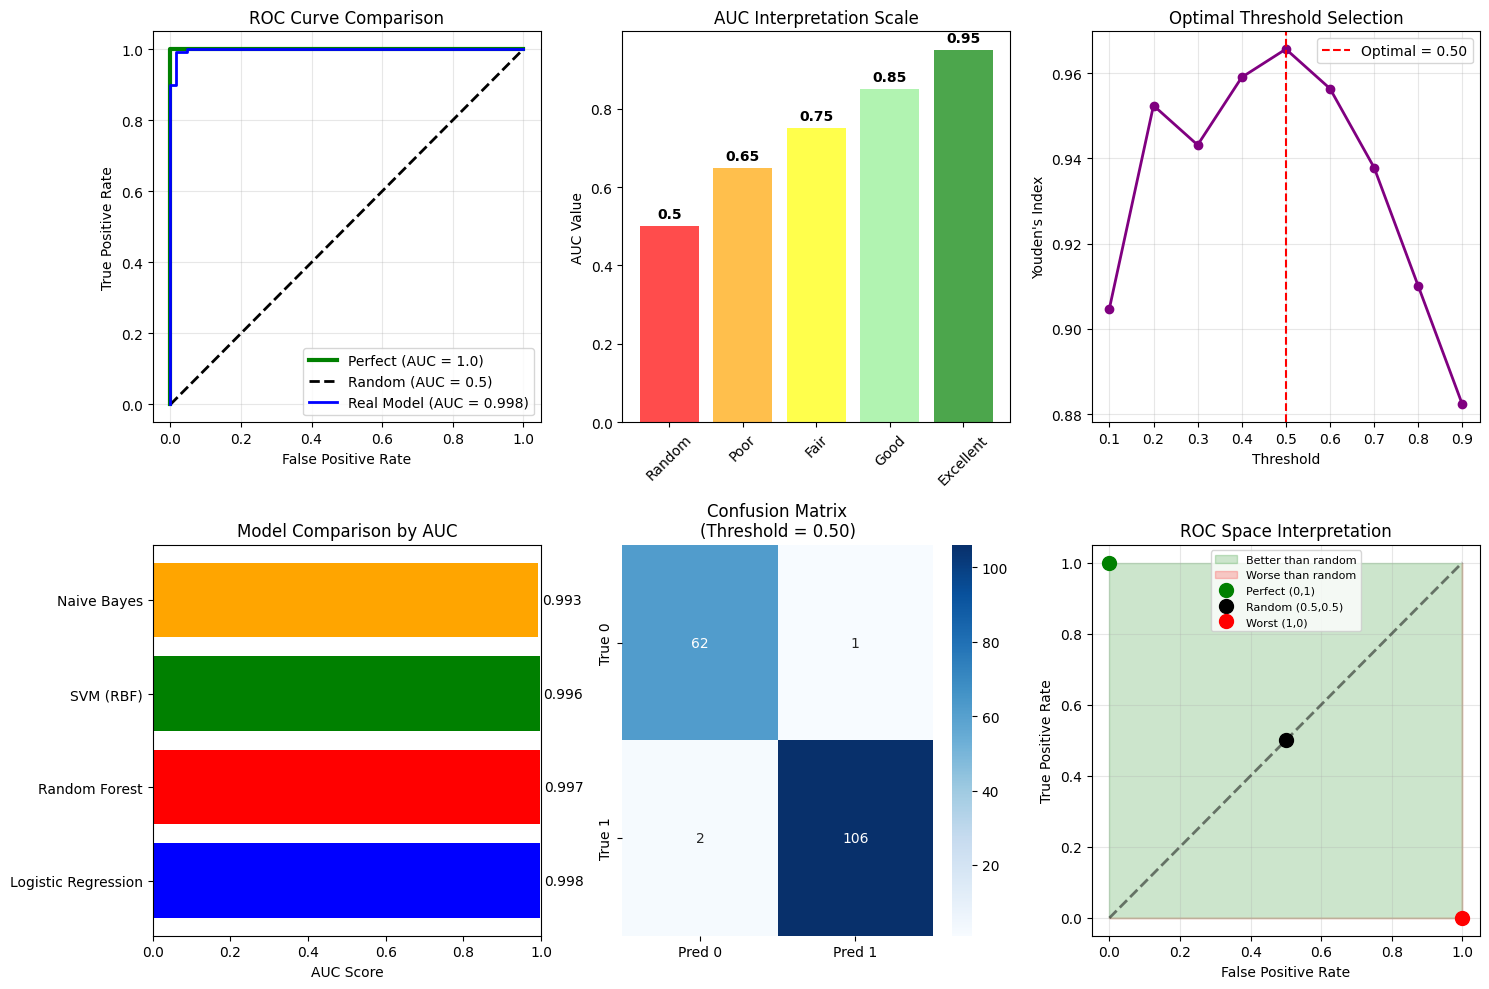


🎉 CONGRATULATIONS!
You now have a comprehensive understanding of ROC curves!
🚀 Ready to apply this knowledge to your own classification problems!


In [ ]:
# Complete ROC Curve Tutorial
# Everything you need to know about Receiver Operating Characteristic curves

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

print("🎯 COMPLETE ROC CURVE TUTORIAL")
print("=" * 50)

# ================================
# 1. WHAT IS ROC CURVE?
# ================================

print("\n📚 SECTION 1: UNDERSTANDING ROC CURVES")
print("-" * 40)

explanation = """
🔍 ROC CURVE BASICS:

ROC = Receiver Operating Characteristic
Originally developed during WWII to analyze radar signals!

📊 WHAT IT PLOTS:
• X-axis: False Positive Rate (FPR) = FP / (FP + TN)
• Y-axis: True Positive Rate (TPR) = TP / (TP + FN) = Recall/Sensitivity

🎯 WHAT IT SHOWS:
• How well a binary classifier distinguishes between classes
• Trade-off between sensitivity (catching positives) and specificity (avoiding false alarms)
• Performance across ALL possible classification thresholds

💡 KEY INSIGHT:
Instead of evaluating at one threshold, ROC shows performance across ALL thresholds!
"""
print(explanation)

# ================================
# 2. UNDERSTANDING TPR AND FPR
# ================================

print("\n📈 SECTION 2: TRUE POSITIVE RATE vs FALSE POSITIVE RATE")
print("-" * 40)

# Create a simple example to illustrate TPR and FPR
np.random.seed(42)

# Simulate prediction probabilities for 20 patients
patients = 20
actual_labels = np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])  # 12 healthy, 8 sick
pred_probabilities = np.array([0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,
                              0.6,0.65,0.2,0.3,0.4,0.7,0.8,0.85,0.9,0.95])

print("🏥 MEDICAL EXAMPLE: 20 Patients (12 Healthy, 8 Sick)")
print("Prediction probabilities (higher = more likely to be sick):")

# Create DataFrame for better visualization
df = pd.DataFrame({
    'Patient': range(1, 21),
    'Actual': ['Healthy' if x == 0 else 'Sick' for x in actual_labels],
    'Probability': pred_probabilities
})

print(df.to_string(index=False))

# Function to calculate TPR and FPR at different thresholds
def calculate_rates_at_threshold(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)

    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Sensitivity/Recall
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # 1 - Specificity

    return tpr, fpr, tp, tn, fp, fn

# Demonstrate at different thresholds
thresholds_to_show = [0.3, 0.5, 0.7]

print(f"\n🎚️ THRESHOLD ANALYSIS:")
print("Threshold | TPR   | FPR   | TP | TN | FP | FN | Interpretation")
print("-" * 70)

for threshold in thresholds_to_show:
    tpr, fpr, tp, tn, fp, fn = calculate_rates_at_threshold(actual_labels, pred_probabilities, threshold)

    if threshold == 0.3:
        interpretation = "Liberal (catch more sick, more false alarms)"
    elif threshold == 0.5:
        interpretation = "Balanced"
    else:
        interpretation = "Conservative (fewer false alarms, miss some sick)"

    print(f"{threshold:^9} | {tpr:^5.2f} | {fpr:^5.2f} | {tp:^2} | {tn:^2} | {fp:^2} | {fn:^2} | {interpretation}")

# ================================
# 3. BUILDING ROC CURVE STEP BY STEP
# ================================

print(f"\n\n🔨 SECTION 3: BUILDING ROC CURVE STEP BY STEP")
print("-" * 40)

# Generate more comprehensive data
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                          n_informative=2, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve manually (for educational purposes)
def manual_roc_curve(y_true, y_prob):
    # Get all unique thresholds (sorted in descending order)
    thresholds = np.sort(np.unique(y_prob))[::-1]

    tpr_values = []
    fpr_values = []

    for threshold in thresholds:
        tpr, fpr, _, _, _, _ = calculate_rates_at_threshold(y_true, y_prob, threshold)
        tpr_values.append(tpr)
        fpr_values.append(fpr)

    # Add endpoints
    fpr_values = [0] + fpr_values + [1]
    tpr_values = [0] + tpr_values + [1]

    return fpr_values, tpr_values, thresholds

# Calculate ROC curve manually and with sklearn
fpr_manual, tpr_manual, thresholds_manual = manual_roc_curve(y_test, y_prob)
fpr_sklearn, tpr_sklearn, thresholds_sklearn = roc_curve(y_test, y_prob)

# Calculate AUC
auc_manual = np.trapz(tpr_manual, fpr_manual)
auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

print(f"📊 ROC CURVE RESULTS:")
print(f"Manual AUC calculation: {auc_manual:.3f}")
print(f"Sklearn AUC calculation: {auc_sklearn:.3f}")
print(f"AUC Score function: {roc_auc_score(y_test, y_prob):.3f}")

# Visualize the ROC curve
plt.figure(figsize=(15, 5))

# Plot 1: Manual vs Sklearn ROC
plt.subplot(1, 3, 1)
plt.plot(fpr_manual, tpr_manual, 'b-', linewidth=2, label=f'Manual ROC (AUC = {auc_manual:.3f})')
plt.plot(fpr_sklearn, tpr_sklearn, 'r--', linewidth=2, label=f'Sklearn ROC (AUC = {auc_sklearn:.3f})')
plt.plot([0, 1], [0, 1], 'k:', linewidth=2, label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve: Manual vs Sklearn')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Plot 2: Data distribution
plt.subplot(1, 3, 2)
class_0_probs = y_prob[y_test == 0]
class_1_probs = y_prob[y_test == 1]

plt.hist(class_0_probs, bins=20, alpha=0.7, label='Class 0 (Negative)', color='red')
plt.hist(class_1_probs, bins=20, alpha=0.7, label='Class 1 (Positive)', color='blue')
plt.axvline(x=0.5, color='black', linestyle='--', label='Threshold = 0.5')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution by Class')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Threshold analysis
plt.subplot(1, 3, 3)
# Show how TPR and FPR change with threshold
sample_thresholds = np.linspace(0, 1, 100)
sample_tpr = []
sample_fpr = []

for thresh in sample_thresholds:
    tpr, fpr, _, _, _, _ = calculate_rates_at_threshold(y_test, y_prob, thresh)
    sample_tpr.append(tpr)
    sample_fpr.append(fpr)

plt.plot(sample_thresholds, sample_tpr, 'b-', linewidth=2, label='True Positive Rate')
plt.plot(sample_thresholds, sample_fpr, 'r-', linewidth=2, label='False Positive Rate')
plt.xlabel('Classification Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# 4. INTERPRETING AUC VALUES
# ================================

print(f"\n\n🎯 SECTION 4: INTERPRETING AUC VALUES")
print("-" * 40)

auc_interpretation = """
📏 AUC INTERPRETATION GUIDE:

🏆 AUC = 1.0: Perfect classifier
   • 100% sensitivity and 100% specificity achievable
   • Can perfectly separate classes

🌟 AUC = 0.9-1.0: Excellent discrimination
   • Very good separation between classes
   • Suitable for most practical applications

✅ AUC = 0.8-0.9: Good discrimination
   • Acceptable performance
   • May need threshold tuning

⚠️ AUC = 0.7-0.8: Fair discrimination
   • Limited practical value
   • Consider feature engineering

❌ AUC = 0.6-0.7: Poor discrimination
   • Better than random, but not much
   • Significant model improvement needed

🎲 AUC = 0.5: Random classifier
   • No discriminative ability
   • Equivalent to coin flip

🔄 AUC < 0.5: Worse than random
   • Model is systematically wrong
   • Simply invert predictions to get AUC > 0.5!
"""
print(auc_interpretation)

# ================================
# 5. COMPARING MULTIPLE MODELS
# ================================

print(f"\n🏁 SECTION 5: COMPARING MULTIPLE MODELS WITH ROC")
print("-" * 40)

# Load real dataset
data = load_breast_cancer()
X_bc, y_bc = data.data, data.target

# Standardize features
scaler = StandardScaler()
X_bc_scaled = scaler.fit_transform(X_bc)

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc_scaled, y_bc, test_size=0.3, random_state=42)

# Train multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM (RBF)': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB()
}

plt.figure(figsize=(12, 8))

# Plot ROC curves for all models
colors = ['blue', 'red', 'green', 'orange']
results = []

for i, (name, model) in enumerate(models.items()):
    # Train model
    model.fit(X_train_bc, y_train_bc)

    # Get probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_bc)[:, 1]
    else:
        y_prob = model.decision_function(X_test_bc)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test_bc, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, color=colors[i], linewidth=2,
             label=f'{name} (AUC = {roc_auc:.3f})')

    results.append({'Model': name, 'AUC': roc_auc})

# Plot random classifier
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves: Model Comparison on Breast Cancer Dataset', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# Display results table
df_results = pd.DataFrame(results).sort_values('AUC', ascending=False)
print(f"\n📊 MODEL RANKING BY AUC:")
print(df_results.to_string(index=False))

# ================================
# 6. ROC CURVE LIMITATIONS
# ================================

print(f"\n\n⚠️ SECTION 6: ROC CURVE LIMITATIONS")
print("-" * 40)

limitations = """
🚨 WHEN ROC CURVES CAN BE MISLEADING:

1. 📊 HIGHLY IMBALANCED DATASETS:
   • ROC can be overly optimistic
   • Precision-Recall curves often better
   • Example: 1% positive cases

2. 🎯 DIFFERENT COSTS OF ERRORS:
   • ROC treats all errors equally
   • Medical diagnosis: Missing cancer >> False alarm
   • Fraud detection: Missing fraud >> False flag

3. 🔄 MULTICLASS PROBLEMS:
   • ROC is designed for binary classification
   • Need One-vs-Rest or One-vs-One approach
   • Can become complex to interpret

4. 📈 THRESHOLD SELECTION:
   • ROC shows performance across all thresholds
   • Doesn't help choose optimal threshold
   • Need additional criteria (cost, business rules)
"""
print(limitations)

# Demonstrate imbalanced dataset limitation
print(f"\n🔍 DEMONSTRATION: Imbalanced Dataset Issue")
print("-" * 40)

# Create highly imbalanced dataset (1% positive)
X_imb, y_imb = make_classification(n_samples=10000, n_features=20,
                                  weights=[0.99, 0.01], random_state=42)

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=42)

# Train model on imbalanced data
model_imb = LogisticRegression(random_state=42)
model_imb.fit(X_train_imb, y_train_imb)
y_prob_imb = model_imb.predict_proba(X_test_imb)[:, 1]

# Calculate ROC and PR curves
from sklearn.metrics import precision_recall_curve, average_precision_score

fpr_imb, tpr_imb, _ = roc_curve(y_test_imb, y_prob_imb)
precision, recall, _ = precision_recall_curve(y_test_imb, y_prob_imb)

roc_auc_imb = auc(fpr_imb, tpr_imb)
pr_auc_imb = average_precision_score(y_test_imb, y_prob_imb)

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_imb, tpr_imb, 'b-', linewidth=2, label=f'ROC (AUC = {roc_auc_imb:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Imbalanced Dataset')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, 'r-', linewidth=2, label=f'PR (AUC = {pr_auc_imb:.3f})')
baseline_precision = np.sum(y_test_imb) / len(y_test_imb)
plt.axhline(y=baseline_precision, color='k', linestyle='--',
            label=f'Baseline = {baseline_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Imbalanced Dataset')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Class distribution: {np.bincount(y_test_imb)[0]} negative, {np.bincount(y_test_imb)[1]} positive")
print(f"ROC AUC: {roc_auc_imb:.3f} (looks good!)")
print(f"PR AUC: {pr_auc_imb:.3f} (reveals poor performance)")
print("📝 Note: ROC looks optimistic, but PR curve shows the real challenge!")

# ================================
# 7. PRACTICAL THRESHOLD SELECTION
# ================================

print(f"\n\n🎛️ SECTION 7: PRACTICAL THRESHOLD SELECTION")
print("-" * 40)

# Use the breast cancer model for threshold selection
model_bc = LogisticRegression(random_state=42)
model_bc.fit(X_train_bc, y_train_bc)
y_prob_bc = model_bc.predict_proba(X_test_bc)[:, 1]

# Calculate metrics at different thresholds
thresholds = np.linspace(0.1, 0.9, 9)
metrics_data = []

for thresh in thresholds:
    y_pred_thresh = (y_prob_bc >= thresh).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test_bc, y_pred_thresh).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics_data.append({
        'Threshold': thresh,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1': f1
    })

df_metrics = pd.DataFrame(metrics_data)
print(f"📊 METRICS AT DIFFERENT THRESHOLDS:")
print(df_metrics.round(3))

# Plot metrics vs threshold
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df_metrics['Threshold'], df_metrics['Accuracy'], 'o-', label='Accuracy')
plt.plot(df_metrics['Threshold'], df_metrics['F1'], 's-', label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Accuracy and F1-Score vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(df_metrics['Threshold'], df_metrics['Precision'], 'o-', label='Precision')
plt.plot(df_metrics['Threshold'], df_metrics['Recall'], 's-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(df_metrics['Threshold'], df_metrics['Recall'], 'o-', label='Sensitivity (Recall)')
plt.plot(df_metrics['Threshold'], df_metrics['Specificity'], 's-', label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Sensitivity and Specificity vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

# ROC curve with some threshold points
plt.subplot(2, 2, 4)
fpr_bc, tpr_bc, roc_thresholds = roc_curve(y_test_bc, y_prob_bc)
plt.plot(fpr_bc, tpr_bc, 'b-', linewidth=2, label=f'ROC (AUC = {auc(fpr_bc, tpr_bc):.3f})')

# Mark some threshold points
for i, thresh in enumerate([0.3, 0.5, 0.7]):
    # Find closest threshold in our data
    closest_idx = np.argmin(np.abs(df_metrics['Threshold'] - thresh))
    actual_thresh = df_metrics.iloc[closest_idx]['Threshold']
    tpr_point = df_metrics.iloc[closest_idx]['Recall']
    fpr_point = 1 - df_metrics.iloc[closest_idx]['Specificity']
    plt.plot(fpr_point, tpr_point, 'ro', markersize=8)
    plt.annotate(f'T≈{actual_thresh:.1f}', (fpr_point, tpr_point), xytext=(5, 5),
                textcoords='offset points', fontsize=8)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Threshold Points')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# 8. ADVANCED ROC CONCEPTS
# ================================

print(f"\n\n🚀 SECTION 8: ADVANCED ROC CONCEPTS")
print("-" * 40)

advanced_concepts = """
🎓 ADVANCED ROC CONCEPTS:

1. 📐 GEOMETRIC INTERPRETATION:
   • Area under curve = Probability that randomly chosen positive
     has higher score than randomly chosen negative
   • Equivalent to Mann-Whitney U statistic
   • Related to Gini coefficient: Gini = 2×AUC - 1

2. 🎯 OPTIMAL THRESHOLD SELECTION:
   • Youden's Index: max(TPR + TNR - 1)
   • Closest to top-left corner: min(√((1-TPR)² + FPR²))
   • Cost-sensitive: consider business costs

3. 🔄 CROSS-VALIDATION WITH ROC:
   • Average ROC curves across folds
   • Report mean AUC with confidence intervals
   • Stratified CV for imbalanced data

4. 📊 STATISTICAL SIGNIFICANCE:
   • DeLong test for comparing AUCs
   • Bootstrap confidence intervals
   • Permutation tests
"""
print(advanced_concepts)

# Demonstrate Youden's Index
print(f"\n🎯 YOUDEN'S INDEX CALCULATION:")
print("-" * 30)

# Calculate Youden's Index for each threshold
youdens_index = df_metrics['Recall'] + df_metrics['Specificity'] - 1
optimal_idx = youdens_index.idxmax()
optimal_threshold = df_metrics.loc[optimal_idx, 'Threshold']
optimal_youden = youdens_index.iloc[optimal_idx]

print(f"Optimal threshold (Youden's Index): {optimal_threshold:.2f}")
print(f"Youden's Index value: {optimal_youden:.3f}")
print(f"At this threshold:")
print(f"  - Sensitivity: {df_metrics.loc[optimal_idx, 'Recall']:.3f}")
print(f"  - Specificity: {df_metrics.loc[optimal_idx, 'Specificity']:.3f}")
print(f"  - Precision: {df_metrics.loc[optimal_idx, 'Precision']:.3f}")

# ================================
# 9. COMMON MISTAKES AND PITFALLS
# ================================

print(f"\n\n❌ SECTION 9: COMMON MISTAKES AND PITFALLS")
print("-" * 40)

common_mistakes = """
🚨 COMMON ROC CURVE MISTAKES:

1. 💔 DATA LEAKAGE:
   ❌ Including future information in features
   ❌ Using entire dataset to select features before CV
   ✅ Proper train/validation/test splits

2. 📊 THRESHOLD CONFUSION:
   ❌ Assuming default threshold (0.5) is optimal
   ❌ Not considering business costs
   ✅ Select threshold based on business requirements

3. 🎯 METRIC MISINTERPRETATION:
   ❌ "AUC = 0.8 means 80% accuracy"
   ❌ Comparing AUCs across different datasets/problems
   ✅ AUC is probability of ranking positive > negative

4. 🔄 CROSS-VALIDATION ERRORS:
   ❌ Testing on training data
   ❌ Not using stratified CV for imbalanced data
   ✅ Proper nested CV for model selection

5. 📈 IMBALANCED DATA IGNORANCE:
   ❌ Relying only on ROC for highly imbalanced data
   ❌ Not considering class weights or sampling
   ✅ Use Precision-Recall curves alongside ROC

6. 🎲 RANDOM STATE NEGLECT:
   ❌ Not setting random seeds
   ❌ Getting different results each run
   ✅ Reproducible experiments with fixed seeds
"""
print(common_mistakes)

# ================================
# 10. SUMMARY AND BEST PRACTICES
# ================================

print(f"\n\n✅ SECTION 10: SUMMARY AND BEST PRACTICES")
print("-" * 40)

summary = """
🏆 ROC CURVE BEST PRACTICES:

📋 WHEN TO USE ROC:
✅ Binary classification problems
✅ Balanced or moderately imbalanced datasets
✅ When both classes are equally important
✅ Comparing multiple models

📋 WHEN TO AVOID ROC:
❌ Highly imbalanced datasets (use PR curves)
❌ When false positives and negatives have very different costs
❌ Multiclass problems (without careful consideration)

📋 REPORTING GUIDELINES:
• Always report AUC with confidence intervals
• Include sample sizes and class distributions
• Specify cross-validation methodology
• Consider multiple metrics (precision, recall, F1)
• Provide confusion matrices at chosen threshold

📋 THRESHOLD SELECTION:
• Use domain knowledge and business requirements
• Consider cost of false positives vs false negatives
• Validate threshold on separate test set
• Monitor performance over time in production

🎯 REMEMBER:
ROC curves are powerful tools, but they're just one piece of the
model evaluation puzzle. Always consider your specific problem
context and business requirements!
"""
print(summary)

# Final comprehensive visualization
plt.figure(figsize=(15, 10))

# Plot 1: Perfect vs Random vs Real classifier
plt.subplot(2, 3, 1)
# Perfect classifier
plt.plot([0, 0, 1], [0, 1, 1], 'g-', linewidth=3, label='Perfect (AUC = 1.0)')
# Random classifier
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.5)')
# Real classifier
plt.plot(fpr_bc, tpr_bc, 'b-', linewidth=2, label=f'Real Model (AUC = {auc(fpr_bc, tpr_bc):.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: AUC interpretation
plt.subplot(2, 3, 2)
auc_values = [0.5, 0.65, 0.75, 0.85, 0.95]
auc_labels = ['Random', 'Poor', 'Fair', 'Good', 'Excellent']
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']
plt.bar(auc_labels, auc_values, color=colors, alpha=0.7)
plt.ylabel('AUC Value')
plt.title('AUC Interpretation Scale')
plt.xticks(rotation=45)
for i, v in enumerate(auc_values):
    plt.text(i, v + 0.02, str(v), ha='center', fontweight='bold')

# Plot 3: Threshold selection
plt.subplot(2, 3, 3)
plt.plot(df_metrics['Threshold'], youdens_index, 'o-', color='purple', linewidth=2)
plt.axvline(x=optimal_threshold, color='red', linestyle='--',
            label=f'Optimal = {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel("Youden's Index")
plt.title('Optimal Threshold Selection')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Model comparison
plt.subplot(2, 3, 4)
model_names = [result['Model'] for result in results]
model_aucs = [result['AUC'] for result in results]
plt.barh(model_names, model_aucs, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('AUC Score')
plt.title('Model Comparison by AUC')
plt.xlim(0, 1)
for i, v in enumerate(model_aucs):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

# Plot 5: Confusion matrix at optimal threshold
plt.subplot(2, 3, 5)
y_pred_optimal = (y_prob_bc >= optimal_threshold).astype(int)
cm_optimal = confusion_matrix(y_test_bc, y_pred_optimal)
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title(f'Confusion Matrix\n(Threshold = {optimal_threshold:.2f})')

# Plot 6: ROC space interpretation
plt.subplot(2, 3, 6)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.5)
plt.fill_between([0, 0, 1], [0, 1, 1], alpha=0.2, color='green', label='Better than random')
plt.fill_between([0, 1, 1], [0, 0, 1], alpha=0.2, color='red', label='Worse than random')
plt.plot(0, 1, 'go', markersize=10, label='Perfect (0,1)')
plt.plot(0.5, 0.5, 'ko', markersize=10, label='Random (0.5,0.5)')
plt.plot(1, 0, 'ro', markersize=10, label='Worst (1,0)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Space Interpretation')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎉 CONGRATULATIONS!")
print("You now have a comprehensive understanding of ROC curves!")
print("🚀 Ready to apply this knowledge to your own classification problems!")